In [1]:
import os

import numpy as np
import pandas as pd
import xarray as xr
import altair as alt
from altair import datum

proj_dir = os.environ["PROJ_DIR"]
alt.data_transformers.enable('default')
# alt.data_transformers.enable('data_server')

/Users/daehyun/.local/share/virtualenvs/FERMI_20144077_Ueda-meGYT3eC/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


DataTransformerRegistry.enable('default')

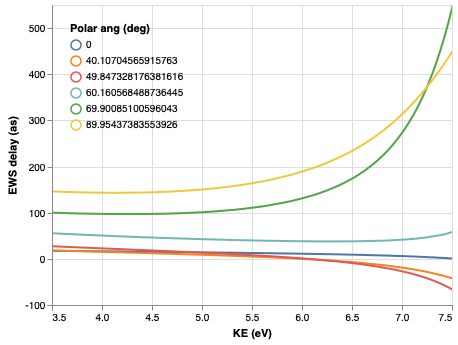

In [28]:
ds = xr.open_dataset(f"{proj_dir}/Data/Ne phase shift.h5", group="/Perturb")
where = {"Photon energy (eV)": ds["Photon energy (eV)"] < 16.3,
         "Polar ang (rad)": ds["Polar ang (rad)"].isin([0, 0.7, 0.87, 1.05, 1.22, 1.57])}
df = (
    ds[where][["KE (eV)", "Polar ang (deg)", "EWS delay (as)"]]
    .to_dataframe()
    .reset_index()
)
fig = (
    alt
    .Chart(df)
    .mark_line(interpolate="monotone")
    .encode(
        x=alt.X("KE (eV):Q", scale=alt.Scale(domain=[3.5, 7.5])),
        y=alt.Y("EWS delay (as):Q", scale=alt.Scale(domain=[-100, 550])),
        color=alt.Color("Polar ang (deg):N", legend=alt.Legend(format=".0f", orient="top-left")),
    )
    .interactive(bind_x=False)
)
fig.save(f"{proj_dir}/Figures/Ne EWS delay - Perturb - Vs KE.html")
fig

In [25]:
data = pd.read_excel(f"{proj_dir}/Data/Ne phase shift.xlsx", sheet_name=None)

for k, df in data.items():
    if "KE (eV)" in df:
        df["KE (eV)"] = df["KE (eV)"].apply("{:.1f}".format)
    if k == "TDCASSCF":
        where = ((df["Group"].isin({"G1430", "G1590", "G1910"}))
                 & (df["Config"] == "sum[m]"))
        data[k] = df[where]
        
data["Measured"].head()

,Method,Group,Group / KE (eV),Photon energy (eV),KE (eV),Config,Polar ang fr (deg),Polar ang to (deg),Polar ang (rad),Polar ang (deg),Phase shift (rad),Phase shift (deg),Phase shift err (rad),Phase shift err (deg),Phase shift fr (deg),Phase shift to (deg)
0,Measured,good1,7.2,15.9,7.2,sum[m],0,5,0.043633,2.5,0.970825,55.624165,0.089057,5.102609,50.521557,60.726774
1,Measured,good1,7.2,15.9,7.2,sum[m],5,10,0.130900,7.5,1.210234,69.341298,0.096733,5.542411,63.798887,74.883708
2,Measured,good1,7.2,15.9,7.2,sum[m],10,15,0.218166,12.5,1.003316,57.485799,0.072731,4.167181,53.318618,61.652980
3,Measured,good1,7.2,15.9,7.2,sum[m],15,20,0.305433,17.5,1.219222,69.856297,0.061948,3.549380,66.306917,73.405677
4,Measured,good1,7.2,15.9,7.2,sum[m],20,25,0.392699,22.5,1.113591,63.804061,0.116181,6.656709,57.147352,70.460770


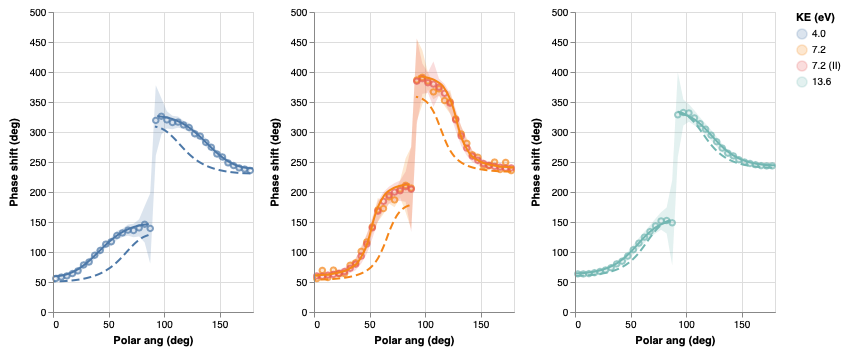

In [30]:
base = {k: alt.Chart(data[k]) for k in ("Measured", "TDCASSCF", "Perturb")}

fig = alt.hconcat()
for ke in ("4.0", "7.2", "13.6"):
    c = (
        base["Measured"].mark_area(opacity=0.2).encode(
            x="Polar ang (deg):Q",
            y=alt.Y("Phase shift fr (deg):Q", axis=alt.Axis(title="Phase shift (deg)"), scale=alt.Scale(domain=[0, 500])),
            y2="Phase shift to (deg):Q",
            color=alt.Color("Group / KE (eV):N", title="KE (eV)"),
        ).transform_filter(datum["KE (eV)"] == ke)
        + base["Measured"].mark_point().encode(
            x="Polar ang (deg)",
            y="Phase shift (deg)",
            color=alt.Color("Group / KE (eV):N", title="KE (eV)"),
        ).transform_filter(datum["KE (eV)"] == ke)
        + base["TDCASSCF"].mark_line(interpolate="monotone").encode(
            x="Polar ang (deg):Q",
            y="Phase shift (deg):Q",
            color="KE (eV):N",
        ).transform_filter(datum["KE (eV)"] == ke)
        + base["Perturb"].mark_line(interpolate="monotone", strokeDash=[8, 4]).encode(
            x="Polar ang (deg)",
            y="Phase shift (deg)",
            color="KE (eV):N",
        ).transform_filter(datum["KE (eV)"] == ke)
    ).properties(width=200)
    fig = fig | c
fig.save(f"{proj_dir}/Figures/Ne phase shift.html")
fig

In [35]:
data = pd.read_excel(f"{proj_dir}/Data/Ne EWS delay.xlsx", sheet_name=None)

for k, df in data.items():
    if k in {"Measured", "TDCASSCF"}:
        where = df["KE range (eV)"].isin({"04.0--07.2"})
        data[k] = df[where]
    if k in {"Perturb"}:
        where = df["KE range (eV)"].isin({"~05.9"})
        data[k] = df[where]
    if "Config" in df:
        where = df["Config"].isin({"sum[m]"})
        data[k] = df[where]

data["Measured"].head()

,Method,Photon energy fr (eV),Photon energy to (eV),KE range (eV),Polar ang fr (deg),Polar ang to (deg),Polar ang (deg),EWS delay (as),EWS delay err (as),EWS delay fr (as),EWS delay to (as)
0,Measured,14.3,15.9,04.0--07.2,0,5,2.5,7.558801,27.092306,-19.533505,34.651108
1,Measured,14.3,15.9,04.0--07.2,5,10,7.5,21.917916,21.266222,0.651695,43.184138
2,Measured,14.3,15.9,04.0--07.2,10,15,12.5,-4.644393,19.656976,-24.301369,15.012583
3,Measured,14.3,15.9,04.0--07.2,15,20,17.5,13.230580,20.140653,-6.910073,33.371233
4,Measured,14.3,15.9,04.0--07.2,20,25,22.5,-16.038608,25.070851,-41.109460,9.032243


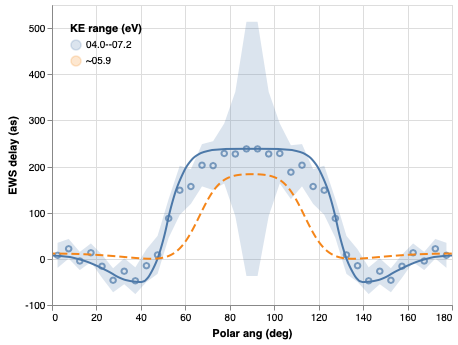

In [36]:
base = {k: alt.Chart(data[k]) for k in ("Measured", "TDCASSCF", "Perturb")}

fig = (
    base["Measured"].mark_area(opacity=0.2).encode(
        x="Polar ang (deg)",
        y=alt.Y("EWS delay fr (as)", axis=alt.Axis(title="EWS delay (as)"), scale=alt.Scale(domain=[-100, 550])),
        y2="EWS delay to (as)",
        color=alt.Color("KE range (eV)", legend=alt.Legend(orient="top-left")),
    )
    + base["Measured"].mark_point().encode(
        x="Polar ang (deg)",
        y="EWS delay (as)",
        color="KE range (eV)",
    )
    + base["TDCASSCF"].mark_line(interpolate="monotone").encode(
        x="Polar ang (deg)",
        y="EWS delay (as)",
        color="KE range (eV)",
    )
    + base["Perturb"].mark_line(interpolate="monotone", strokeDash=[8, 4]).encode(
        x="Polar ang (deg)",
        y="EWS delay (as)",
        color="KE range (eV)",
    )
).interactive(bind_x=False)
fig.save(f"{proj_dir}/Figures/Ne EWS delay.html")
fig